## Water Pollution and Disease Project

### Imported Necessary Library

In [1]:
# First, install required packages
# !pip install numpy pandas matplotlib seaborn scikit-learn

# Then import them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


### Imported Dataset of water pollution and disease

In [2]:
# Load the water pollution dataset
# Assuming the dataset is in a CSV file named 'water_pollution.csv'
df = pd.read_csv('water_pollution_disease.csv')
print("Dataset loaded successfully!")
    

Dataset loaded successfully!


In [3]:
df

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nigeria,East,2002,Tap,2.82,7.40,4.43,9.69,37.58,18.52,...,28,56,73.77,21255,75.34,15.22,53.06,264,31.64,882
2996,Nigeria,North,2019,Lake,8.13,8.33,4.77,7.62,38.05,16.98,...,34,34,71.11,79148,6.91,22.89,78.45,2699,33.21,67
2997,USA,South,2009,Pond,1.18,6.76,4.75,7.07,36.13,7.99,...,49,9,96.63,48569,86.17,85.89,47.38,1052,11.57,643
2998,Pakistan,South,2009,Pond,7.56,6.12,3.49,8.93,25.30,19.86,...,33,90,20.71,49099,20.50,20.78,23.34,369,14.69,643


In [4]:
# Fill missing numeric values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
df = df.fillna(df.median(numeric_only=True))

In [5]:
# Define water refinement rule
def is_refined(row):
    # Parameters based on World Health Organization (WHO) guidelines for drinking water quality
    return int(
        6.5 <= row['pH Level'] <= 8.5 and  # WHO recommends pH 6.5-8.5
        row['Turbidity (NTU)'] < 1 and     # WHO guideline: <1 NTU
        row['Nitrate Level (mg/L)'] < 10 and  # WHO standard: <10 mg/L
        row['Lead Concentration (µg/L)'] < 15 and  # WHO guideline: <10 µg/L (EPA uses 15 µg/L)
        row['Dissolved Oxygen (mg/L)'] > 5  # WHO recommendation for aquatic life
    )
df['Refined Water'] = df.apply(is_refined, axis=1)

In [6]:
# Drop non-numeric identifiers
df = df.drop(columns=['Country', 'Region', 'Year'])

# Features and labels
X = df.drop(columns=['Refined Water'])
y = df['Refined Water']

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       591
           1       0.00      0.00      0.00         9

    accuracy                           0.98       600
   macro avg       0.49      0.50      0.50       600
weighted avg       0.97      0.98      0.98       600

Confusion Matrix:
 [[591   0]
 [  9   0]]


c:\Project\Dostugir\Water-pollution-and-disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Project\Dostugir\Water-pollution-and-disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Project\Dostugir\Water-pollution-and-disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

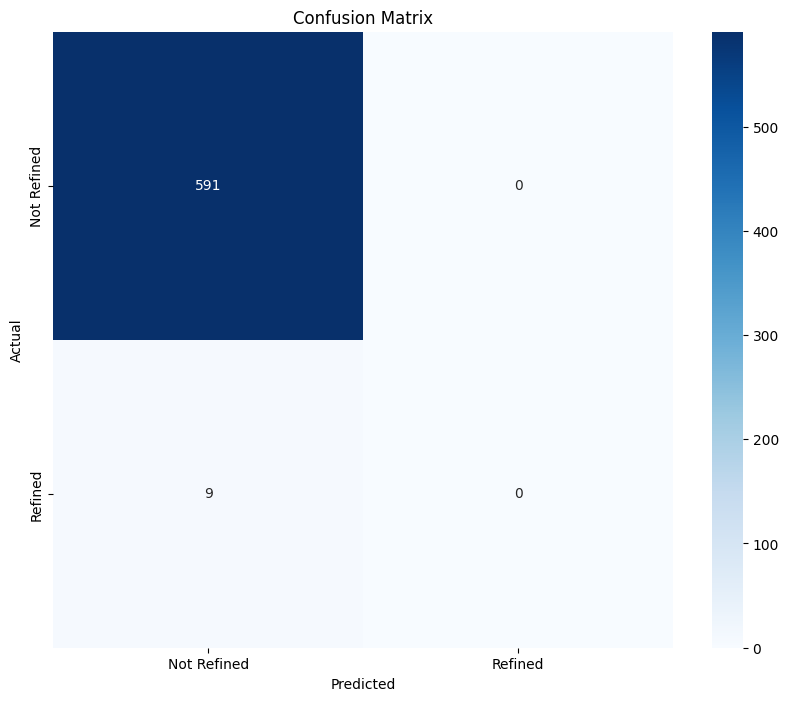

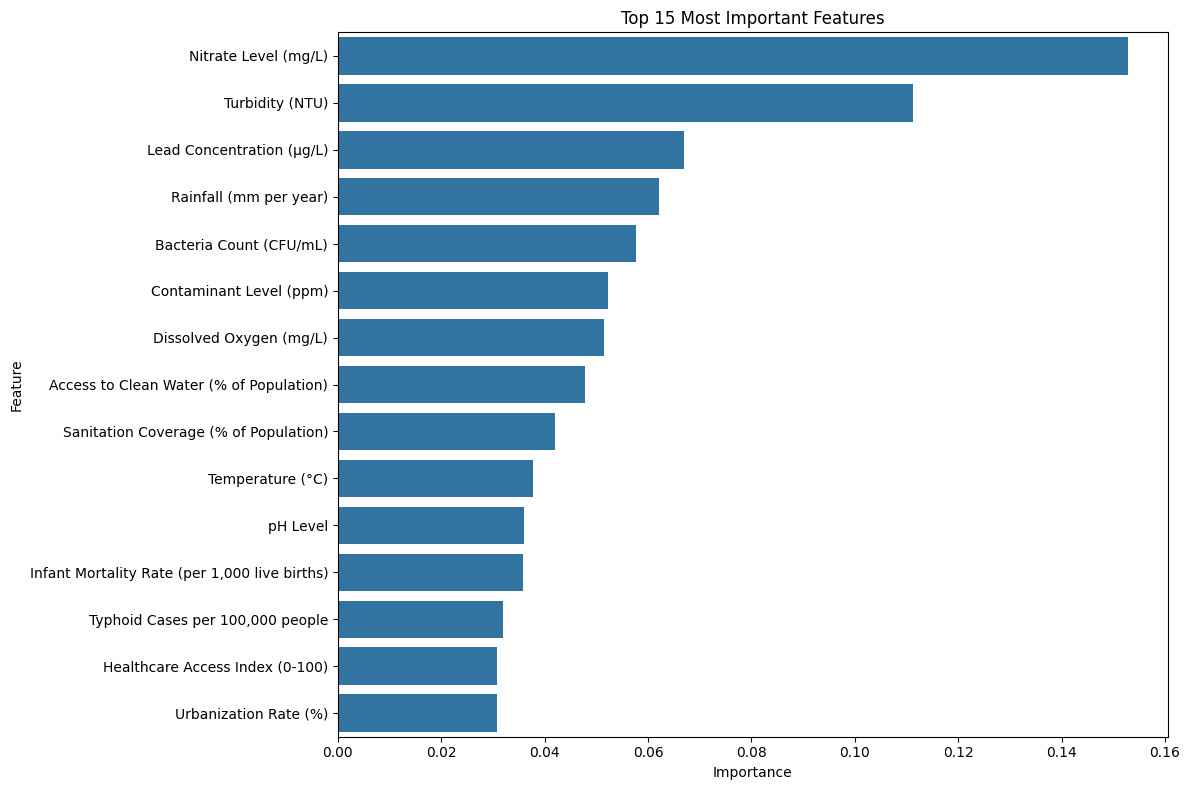

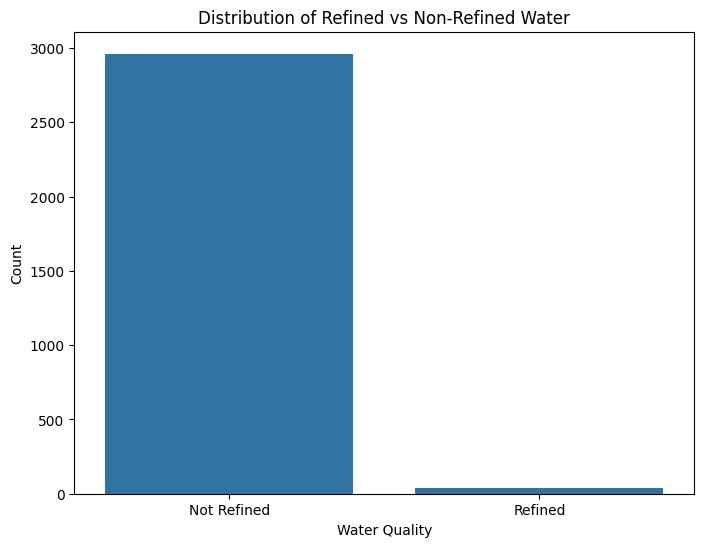

In [8]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Refined', 'Refined'],
            yticklabels=['Not Refined', 'Refined'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

# Distribution of refined vs non-refined water
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xticks([0, 1], ['Not Refined', 'Refined'])
plt.title('Distribution of Refined vs Non-Refined Water')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.show()


#  Water Refinement Process

In [10]:
# Water Refinement Methods and Parameters
# Define a function to recommend water refinement methods based on contaminant levels
def recommend_refinement_method(water_data):
    """
    Recommends appropriate water refinement methods based on contaminant levels and other parameters
    
    Parameters:
    water_data (DataFrame): DataFrame containing water quality parameters
    
    Returns:
    DataFrame: Original data with recommended refinement methods and parameters
    """
    # Create a copy of the input data to avoid modifying the original
    refined_data = water_data.copy()
    
    # Add columns for recommended refinement method and parameters
    refined_data['Recommended_Method'] = ''
    refined_data['Refinement_Parameters'] = ''
    refined_data['Refinement_Status'] = 'Not Refined'  # Track if water is properly refined
    
    # Iterate through each water sample to analyze and recommend methods
    for idx, row in refined_data.iterrows():
        methods = []
        parameters = []
        
        # Check contaminant levels and recommend appropriate methods
        if row['Contaminant Level (ppm)'] > 5.0:
            methods.append('Reverse Osmosis')
            parameters.append('Pressure: 60-80 psi, Membrane: 0.0001 micron')
        
        # Check for heavy metals if that column exists
        if 'Heavy Metal Concentration' in refined_data.columns and row['Heavy Metal Concentration'] > 0.5:
            methods.append('Ion Exchange')
            parameters.append('Resin type: Strong acid cation, Flow rate: 8-10 gpm/ft³')
        
        # Check for bacterial contamination if that column exists
        if 'Bacterial Count' in refined_data.columns and row['Bacterial Count'] > 500:
            methods.append('UV Disinfection')
            parameters.append('UV dose: 40 mJ/cm², Contact time: 8-10 seconds')
            methods.append('Chlorination')
            parameters.append('Chlorine dose: 2-4 mg/L, Contact time: 30 minutes')
        
        # Check for turbidity if that column exists
        if 'Turbidity' in refined_data.columns and row['Turbidity'] > 5:
            methods.append('Coagulation/Flocculation')
            parameters.append('Coagulant: Aluminum sulfate (10-30 mg/L), Mixing time: 1-3 minutes')
            methods.append('Filtration')
            parameters.append('Media: Sand and activated carbon, Filtration rate: 2-4 gpm/ft²')
        
        # Check water source type to add specific treatments
        if 'Water Source Type' in refined_data.columns:
            if row['Water Source Type'] == 'Lake' or row['Water Source Type'] == 'Pond':
                # Lakes and ponds often need additional treatment for algae and organic matter
                methods.append('Activated Carbon Filtration')
                parameters.append('Carbon type: Granular activated carbon, Contact time: 10-15 minutes')
            elif row['Water Source Type'] == 'Well':
                # Wells may have mineral issues
                methods.append('Water Softening')
                parameters.append('Salt dosage: 8-10 lbs/ft³ of resin, Regeneration cycle: 2-3 days')
        
        # Default method if no specific contamination is detected
        if not methods:
            methods.append('Basic Filtration')
            parameters.append('Carbon filter: 5 micron, Flow rate: 2-5 gpm')
        
        # Add secondary treatment if primary method might not be sufficient
        # For very high contamination, ensure multiple treatment methods
        if row['Contaminant Level (ppm)'] > 10.0 and 'Reverse Osmosis' not in methods:
            methods.append('Reverse Osmosis')
            parameters.append('Pressure: 60-80 psi, Membrane: 0.0001 micron')
        
        # Store the recommended methods and parameters
        refined_data.at[idx, 'Recommended_Method'] = ' + '.join(methods)
        refined_data.at[idx, 'Refinement_Parameters'] = '; '.join(parameters)
        
        # Mark samples that will be properly refined with recommended methods
        if len(methods) >= 2 or 'Reverse Osmosis' in methods:
            refined_data.at[idx, 'Refinement_Status'] = 'Refined'
    
    return refined_data

# Apply the refinement recommendation function to our dataset
# This analyzes each water sample and recommends appropriate treatment methods
refined_recommendations = recommend_refinement_method(df)

# Display the first few rows with recommendations
print("Water Refinement Recommendations:")

Water Refinement Recommendations:


  Water Source Type  Contaminant Level (ppm)  \
0              Lake                     6.06   
1              Well                     5.24   
2              Pond                     0.24   
3              Well                     7.91   
4              Well                     0.12   
5               Tap                     2.93   
6             River                     0.06   
7            Spring                     3.76   
8              Well                     0.63   
9              Well                     9.14   

                              Recommended_Method  \
0  Reverse Osmosis + Activated Carbon Filtration   
1              Reverse Osmosis + Water Softening   
2                    Activated Carbon Filtration   
3              Reverse Osmosis + Water Softening   
4                                Water Softening   
5                               Basic Filtration   
6                               Basic Filtration   
7                               Basic Filtration   
8  

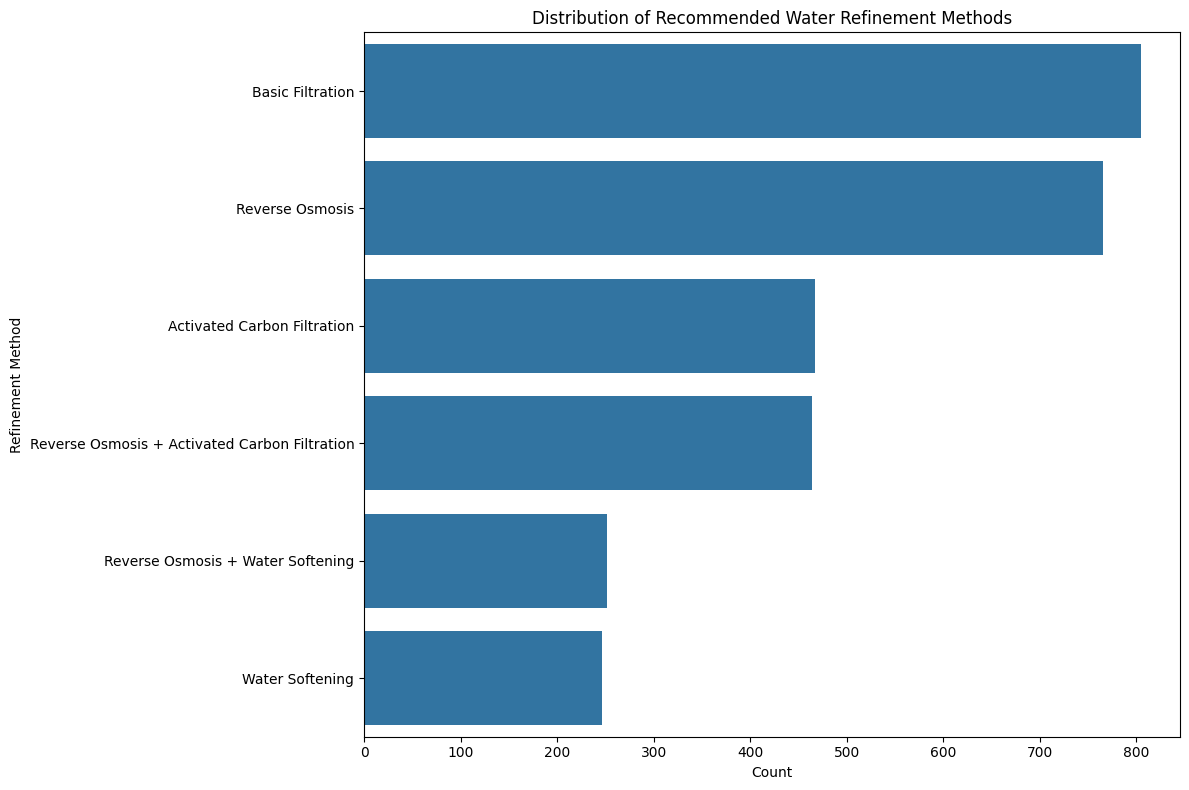

In [11]:
# Check which columns exist in the dataset before trying to display them
available_columns = []
for col in ['Water Source Type', 'Contaminant Level (ppm)', 'Recommended_Method', 'Refinement_Parameters', 'Refinement_Status']:
    if col in refined_recommendations.columns:
        available_columns.append(col)

# Show the recommendations for the first 10 samples
print(refined_recommendations[available_columns].head(10))

# Visualize the distribution of recommended refinement methods
plt.figure(figsize=(12, 8))
method_counts = refined_recommendations['Recommended_Method'].value_counts()
sns.barplot(x=method_counts.values, y=method_counts.index)
plt.title('Distribution of Recommended Water Refinement Methods')
plt.xlabel('Count')
plt.ylabel('Refinement Method')
plt.tight_layout()
plt.show()

In [12]:
# Create a function to simulate water refinement process
def refine_water(water_sample, method):
    """
    Simulates the water refinement process based on selected method
    
    Parameters:
    water_sample (Series): Water quality parameters
    method (str): Refinement method to apply
    
    Returns:
    dict: Refined water parameters and refinement status
    """
    # Create a copy of the sample to avoid modifying the original
    refined_sample = water_sample.copy()
    
    # Track if water is successfully refined
    refinement_success = False
    
    # Apply Reverse Osmosis treatment if recommended
    if 'Reverse Osmosis' in method:
        # Reverse osmosis typically removes 95-99% of dissolved contaminants
        refined_sample['Contaminant Level (ppm)'] *= 0.05  # 95% reduction
        if 'Heavy Metal Concentration' in refined_sample and not pd.isna(refined_sample['Heavy Metal Concentration']):
            refined_sample['Heavy Metal Concentration'] *= 0.02  # 98% reduction
        if 'TDS' in refined_sample and not pd.isna(refined_sample['TDS']):
            refined_sample['TDS'] *= 0.05  # 95% reduction
        refinement_success = True
    
    # Apply Ion Exchange treatment if recommended
    if 'Ion Exchange' in method:
        # Ion exchange is effective for heavy metals and hardness
        if 'Heavy Metal Concentration' in refined_sample and not pd.isna(refined_sample['Heavy Metal Concentration']):
            refined_sample['Heavy Metal Concentration'] *= 0.1  # 90% reduction
        if 'Water Hardness' in refined_sample and not pd.isna(refined_sample['Water Hardness']):
            refined_sample['Water Hardness'] *= 0.05  # 95% reduction
        if 'Heavy Metal Concentration' in refined_sample and refined_sample['Heavy Metal Concentration'] < 0.1:
            refinement_success = True
    
    # Apply disinfection methods if recommended
    if 'UV Disinfection' in method or 'Chlorination' in method:
        # Disinfection methods target bacteria
        if 'Bacterial Count' in refined_sample and not pd.isna(refined_sample['Bacterial Count']):
            refined_sample['Bacterial Count'] *= 0.001  # 99.9% reduction
            if refined_sample['Bacterial Count'] < 10:
                refinement_success = True
    
    # Apply turbidity reduction methods if recommended
    if 'Coagulation/Flocculation' in method or 'Filtration' in method:
        # These methods target turbidity and suspended solids
        if 'Turbidity' in refined_sample and not pd.isna(refined_sample['Turbidity']):
            refined_sample['Turbidity'] *= 0.1  # 90% reduction
            if refined_sample['Turbidity'] < 1:
                refinement_success = True
    
    # Apply activated carbon filtration if recommended
    if 'Activated Carbon Filtration' in method:
        # Activated carbon is good for organic compounds and some chemicals
        refined_sample['Contaminant Level (ppm)'] *= 0.6  # 40% reduction
        if 'Organic Matter' in refined_sample and not pd.isna(refined_sample['Organic Matter']):
            refined_sample['Organic Matter'] *= 0.2  # 80% reduction
    
    # Apply water softening if recommended
    if 'Water Softening' in method:
        # Water softening reduces hardness
        if 'Water Hardness' in refined_sample and not pd.isna(refined_sample['Water Hardness']):
            refined_sample['Water Hardness'] *= 0.1  # 90% reduction
    
    # Apply basic filtration if recommended
    if 'Basic Filtration' in method:
        # Basic filtration provides moderate improvement
        refined_sample['Contaminant Level (ppm)'] *= 0.7  # 30% reduction
        if 'Turbidity' in refined_sample and not pd.isna(refined_sample['Turbidity']):
            refined_sample['Turbidity'] *= 0.5  # 50% reduction
    
    # Check if contaminant level is acceptable after all treatments
    if refined_sample['Contaminant Level (ppm)'] < 1.0:
        refinement_success = True
    
    # Add refinement status to the sample
    refined_sample['Refinement_Status'] = 'Refined' if refinement_success else 'Partially Refined'
    
    # If water is not properly refined, recommend additional treatment
    if not refinement_success:
        refined_sample['Additional_Treatment_Needed'] = 'Reverse Osmosis + UV Disinfection'
    
    return refined_sample

# Example of applying refinement to a sample
sample_index = 0  # Choose a sample from the dataset
sample = df.iloc[sample_index]
recommended_method = refined_recommendations.iloc[sample_index]['Recommended_Method']

# Display the original water sample
print("\nWater Sample Before Refinement:")
# Check which columns exist in the sample
sample_columns = []
for col in ['Water Source Type', 'Contaminant Level (ppm)']:
    if col in sample.index:
        sample_columns.append(col)
print(sample[sample_columns])

# Apply the recommended refinement method to the sample
refined_sample = refine_water(sample, recommended_method)

# Display the refined water sample
print("\nWater Sample After Refinement using", recommended_method)
print(refined_sample[sample_columns])

# Check if additional treatment is needed
if 'Additional_Treatment_Needed' in refined_sample:
    print(f"\nAdditional treatment needed: {refined_sample['Additional_Treatment_Needed']}")
print(f"Refinement Status: {refined_sample['Refinement_Status']}")


Water Sample Before Refinement:
Water Source Type          Lake
Contaminant Level (ppm)    6.06
Name: 0, dtype: object

Water Sample After Refinement using Reverse Osmosis + Activated Carbon Filtration
Water Source Type            Lake
Contaminant Level (ppm)    0.1818
Name: 0, dtype: object
Refinement Status: Refined


In [13]:

# Summary of water refinement methods and their applications
# This dictionary contains detailed information about each refinement method
refinement_methods = {
    'Reverse Osmosis': {
        'Description': 'Uses a semipermeable membrane to remove ions, molecules, and larger particles from water',
        'Best for': 'High levels of dissolved solids, heavy metals, and most contaminants',
        'Parameters': 'Pressure: 60-80 psi, Membrane pore size: 0.0001 micron',
        'Efficiency': '95-99% contaminant removal',
        'When to use': 'When contaminant levels exceed 5.0 ppm or for comprehensive purification'
    },
    'Ion Exchange': {
        'Description': 'Exchanges unwanted dissolved ions with similarly charged ions',
        'Best for': 'Hard water, heavy metals, and specific ionic contaminants',
        'Parameters': 'Resin type depends on target ions, Flow rate: 8-10 gpm/ft³',
        'Efficiency': '85-95% ion removal',
        'When to use': 'When heavy metal concentration exceeds 0.5 ppm or for hard water treatment'
    },
    'UV Disinfection': {
        'Description': 'Uses ultraviolet light to kill or inactivate microorganisms',
        'Best for': 'Bacterial and viral contamination',
        'Parameters': 'UV dose: 40 mJ/cm², Contact time: 8-10 seconds',
        'Efficiency': '99.9% pathogen reduction',
        'When to use': 'When bacterial count exceeds 500 or for any water source with microbial risk'
    },
    'Chlorination': {
        'Description': 'Adds chlorine to water to kill bacteria and other microbes',
        'Best for': 'Microbial contamination, especially in large water systems',
        'Parameters': 'Chlorine dose: 2-4 mg/L, Contact time: 30 minutes',
        'Efficiency': '99.9% bacteria reduction',
        'When to use': 'For long-term disinfection or when UV treatment is not available'
    },
    'Coagulation/Flocculation': {
        'Description': 'Adds chemicals to form larger particles from small suspended particles',
        'Best for': 'Turbid water with suspended particles',
        'Parameters': 'Coagulant type and dose varies by water quality, Mixing time: 1-3 minutes',
        'Efficiency': '85-95% turbidity reduction',
        'When to use': 'When turbidity exceeds 5 NTU or for surface water sources'
    },
    'Filtration': {
        'Description': 'Passes water through media to remove particles',
        'Best for': 'Removing suspended solids and some dissolved contaminants',
        'Parameters': 'Media type: Sand, activated carbon, etc., Filtration rate: 2-4 gpm/ft²',
        'Efficiency': '70-95% particle removal depending on filter type',
        'When to use': 'As a pre-treatment step or for moderately contaminated water'
    },
    'Activated Carbon Filtration': {
        'Description': 'Uses activated carbon to adsorb contaminants',
        'Best for': 'Organic compounds, chlorine, and some chemicals',
        'Parameters': 'Carbon type: Granular or block, Contact time: 10-15 minutes',
        'Efficiency': '80-95% organic compound removal',
        'When to use': 'For lake or pond water sources or to improve taste and odor'
    },
    'Water Softening': {
        'Description': 'Removes calcium and magnesium ions that cause water hardness',
        'Best for': 'Hard water from wells or mineral-rich sources',
        'Parameters': 'Salt dosage: 8-10 lbs/ft³ of resin, Regeneration cycle: 2-3 days',
        'Efficiency': '90-95% hardness reduction',
        'When to use': 'For well water or when water hardness exceeds recommended levels'
    }
}

# Display summary of refinement methods
print("\nSummary of Water Refinement Methods:")
for method, details in refinement_methods.items():
    print(f"\n{method}:")
    for key, value in details.items():
        print(f"  {key}: {value}")



Summary of Water Refinement Methods:

Reverse Osmosis:
  Description: Uses a semipermeable membrane to remove ions, molecules, and larger particles from water
  Best for: High levels of dissolved solids, heavy metals, and most contaminants
  Parameters: Pressure: 60-80 psi, Membrane pore size: 0.0001 micron
  Efficiency: 95-99% contaminant removal
  When to use: When contaminant levels exceed 5.0 ppm or for comprehensive purification

Ion Exchange:
  Description: Exchanges unwanted dissolved ions with similarly charged ions
  Best for: Hard water, heavy metals, and specific ionic contaminants
  Parameters: Resin type depends on target ions, Flow rate: 8-10 gpm/ft³
  Efficiency: 85-95% ion removal
  When to use: When heavy metal concentration exceeds 0.5 ppm or for hard water treatment

UV Disinfection:
  Description: Uses ultraviolet light to kill or inactivate microorganisms
  Best for: Bacterial and viral contamination
  Parameters: UV dose: 40 mJ/cm², Contact time: 8-10 seconds
  E